# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

**Version:** 0.250507.2356

---

**Disclaimer:** This notebook was AI-generated to assist in exploring Dandiset 001433. While efforts have been made to ensure accuracy and utility, the code and interpretations have not been fully verified by human experts. Please exercise caution when using or interpreting the code and results presented herein. Independent verification is highly recommended.

---

## Overview of the Dandiset

This notebook explores **Dandiset 001433**, titled *"Breathing rhythm and place dataset"*.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

**Description:**
*These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903*

**Citation:**
*Breathing rhythm and place dataset (2025). (Version 0.250507.2356) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001433/0.250507.2356*

**Contributors:**
- National Institutes of Health (NIH)
- Smear, Matt

**Measurement Techniques:**
- surgical technique
- multi electrode extracellular electrophysiology recording technique
- analytical technique

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading metadata for Dandiset 001433.
3. Listing some assets (files) available in this Dandiset.
4. Selecting one NWB (Neurodata Without Borders) file from the Dandiset.
5. Loading and inspecting the metadata of the selected NWB file.
6. Summarizing the contents of the NWB file.
7. Providing a link to explore the NWB file interactively on Neurosift.
8. Demonstrating how to load and visualize some data from the NWB file, such as:
    - LFP (Local Field Potential) data
    - Sniff signal data
    - Behavioral event times (inhalation/exhalation)
9. Summarizing findings and suggesting potential future directions for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed. This notebook assumes they are already available in your Python environment.

- `dandi` (for interacting with the DANDI Archive API)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 file operations)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `pandas` (for data manipulation and display, e.g., for electrode tables)
- `seaborn` (for enhanced visualizations)

No `pip install` commands are included here.

## 1. Connecting to DANDI and Loading Dandiset Information

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001433"
dandiset_version = "0.250507.2356"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Use asset.identifier as per DANDI API common usage

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Dandiset description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## 2. Selecting and Loading an NWB File

For this demonstration, we will select one NWB file from the Dandiset to explore its contents.

The file we've chosen is:
`sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`

Its asset ID on DANDI is `63d19f03-2a35-48bd-a54f-9ab98ceb7be2`.

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/`

We will use `pynwb`, `h5py`, and `remfile` to stream and read this file directly from the DANDI archive.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plotting aesthetics (for non-image plots)
sns.set_theme()

# Define the URL of the NWB file chosen for analysis
nwb_file_url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
nwb_file_path_in_dandiset = "sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb"

print(f"Loading NWB file: {nwb_file_path_in_dandiset}")
print(f"From URL: {nwb_file_url}")

# Load the NWB file using remfile for streaming
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for io
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(nwbfile)

Loading NWB file: sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
From URL: https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/



NWB file loaded successfully.
root pynwb.file.NWBFile at 0x127979485092304
Fields:
  acquisition: {
    LFP <class 'pynwb.ecephys.ElectricalSeries'>,
    SniffSignal <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    OpenEphys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    LFPGroup <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: LFP and sniff behavior recording
  experimenter: ['Rafilson, Sidney']
  file_create_date: [datetime.datetime(2025, 5, 7, 15, 29, 27, 359523, tzinfo=tzoffset(None, -25200))]
  identifier: 4122_4
  institution: University of Oregon
  keywords: <StrDataset for HDF5 dataset "keywords": shape (5,), type "|O">
  lab: Smear lab
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  session_description: LFP and sniff recording
  session_start_time: 2025-05-07 15:29:27.359523-07:00
  subject: subject pynwb.file.Subject at 0x127979449483488
Fields:
  a

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### 2.1. Basic NWB File Information

Let's display some general metadata from the loaded NWB file.

In [3]:
print(f"Session Description: {nwbfile.session_description}")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Experimenter(s): {nwbfile.experimenter}")
print(f"Lab: {nwbfile.lab}")
print(f"Institution: {nwbfile.institution}")
print(f"Experiment Description: {nwbfile.experiment_description}")
if nwbfile.subject:
    print(f"Subject ID: {nwbfile.subject.subject_id}")
    print(f"Subject Species: {nwbfile.subject.species}")
    print(f"Subject Sex: {nwbfile.subject.sex}")
    print(f"Subject Age: {nwbfile.subject.age}")

Session Description: LFP and sniff recording
Identifier: 4122_4
Session Start Time: 2025-05-07 15:29:27.359523-07:00
Experimenter(s): ('Rafilson, Sidney',)
Lab: Smear lab
Institution: University of Oregon
Experiment Description: LFP and sniff behavior recording
Subject ID: 4122
Subject Species: Mus musculus
Subject Sex: M
Subject Age: P90D


### 2.2. Explore the NWB file on Neurosift

You can explore this NWB file interactively using Neurosift. Click the link below:

[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356)

(Note: The link uses the dandisetVersion `0.250507.2356` as specified)

### 2.3. Summary of NWB File Contents

The NWB file format organizes data into various groups. Here's a high-level summary of the main data components found in `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`:

- **General Metadata:**
    - `session_description`: "LFP and sniff recording"
    - `identifier`: "4122_4"
    - `session_start_time`: 2025-05-07T15:29:27.359523-07:00
    - `experimenter`: ['Rafilson, Sidney']
    - `keywords`: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']
- **Subject Information:**
    - `subject_id`: "4122"
    - `age`: "P90D"
    - `sex`: "M"
    - `species`: "Mus musculus"
- **Electrodes Table (`nwbfile.electrodes`):**
  Metadata about the extracellular electrodes used.
  - Columns: `location`, `group`, `group_name`, `filtering`
  - This table provides details for each of the 16 channels.
- **Acquisition Data (`nwbfile.acquisition`):**
  Raw acquired data.
    - **`LFP` (ElectricalSeries):**
        - Description: "LFP signal from olfactory bulb"
        - Data shape: (1969184 samples, 16 channels)
        - Sampling rate: 1000.0 Hz
        - Unit: volts
        - Electrodes: References the electrodes table for channel mapping.
    - **`SniffSignal` (TimeSeries):**
        - Description: "Raw sniff thermistor voltage"
        - Data shape: (1969184 samples,)
        - Sampling rate: 1000.0 Hz
        - Unit: volts
- **Processing Modules (`nwbfile.processing`):**
  Processed data.
    - **`behavior` (ProcessingModule):**
        - Description: "Sniff event features"
        - Data Interfaces:
            - **`exhalation_time` (TimeSeries):**
                - Description: "exhalation_time (s)"
                - Data shape: (10030 events,) (these are likely indices or flags)
                - Timestamps shape: (10030 events,) (actual time of exhalation events)
            - **`inhalation_time` (TimeSeries):**
                - Description: "inhalation_time (s)"
                - Data shape: (10030 events,)
                - Timestamps shape: (10030 events,) (actual time of inhalation events)
- **Electrode Groups (`nwbfile.electrode_groups`):**
  Defines groups of electrodes.
    - `LFPGroup`:
        - Description: "LFP recording electrodes"
        - Location: "Olfactory Bulb"
- **Devices Used (`nwbfile.devices`):**
    - `OpenEphys`:
        - Description: "OpenEphys recording system"

Let's explore the electrodes table.

In [4]:
if nwbfile.electrodes is not None:
    electrodes_df = nwbfile.electrodes.to_dataframe()
    print("Electrodes Table:")
    print(electrodes_df)
else:
    print("No electrodes table found in this NWB file.")

# Adding channel IDs to the dataframe if they are not the index
if 'channel_id' not in electrodes_df.columns and electrodes_df.index.name == 'id':
    electrodes_df['channel_id'] = electrodes_df.index

Electrodes Table:
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
5   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
6   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
7   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
8   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
9   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
10  olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x127...   
11  olfactory bulb  LFPGroup pynw

## 3. Visualizing Data from the NWB File

Now, let's load and visualize some of the data. We'll focus on:
1. A segment of the LFP data from a few channels.
2. A segment of the Sniff signal.
3. The distribution of inhalation/exhalation event times.

### 3.1. LFP Data

The LFP data is stored in `nwbfile.acquisition['LFP']`. It has 16 channels.
We will plot a short segment (e.g., the first 2 seconds) from the first 3 channels.

Important: The data is loaded remotely. We should request only the slice of data we need to avoid downloading the entire dataset for a simple plot.

LFP data shape: (1969184, 16)
LFP sampling rate: 1000.0 Hz


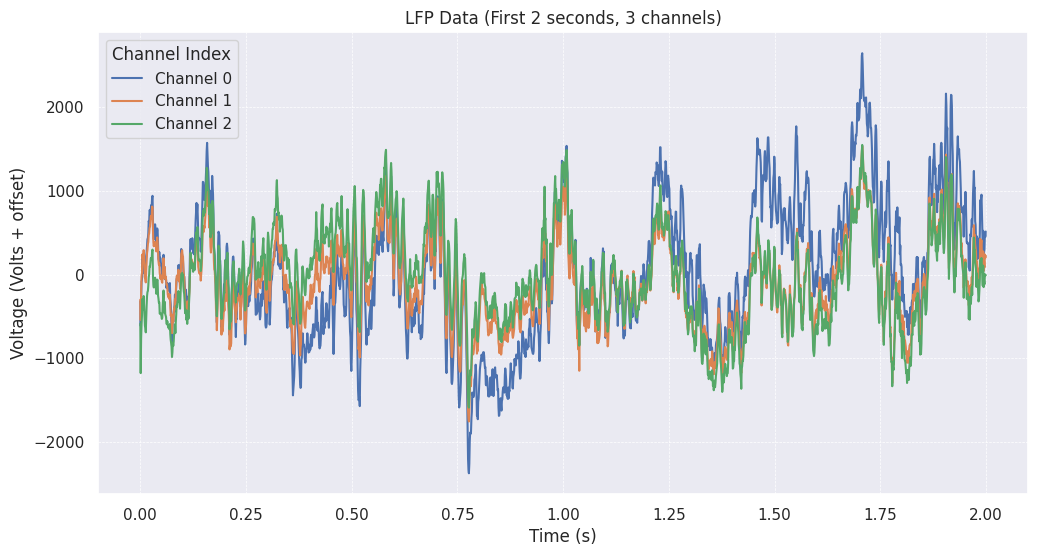

Plotted LFP data for channels [0, 1, 2] for the first 2 seconds.
Note: An offset has been added to each channel's trace for visual clarity.


In [5]:
lfp_series = nwbfile.acquisition.get('LFP')

if lfp_series:
    print(f"LFP data shape: {lfp_series.data.shape}")
    print(f"LFP sampling rate: {lfp_series.rate} Hz")

    # Define a time segment to plot (e.g., first 2 seconds)
    time_duration_to_plot_s = 2  # seconds
    num_samples_to_plot = int(time_duration_to_plot_s * lfp_series.rate)

    # Select a few channels to plot (e.g., first 3 channels: 0, 1, 2)
    # We need actual channel IDs if available, otherwise use indices.
    # The electrodes table usually has IDs for channels. Let's assume indices for now if IDs are complex.
    channels_to_plot_indices = [0, 1, 2]
    num_channels_to_plot = len(channels_to_plot_indices)

    # Ensure we don't exceed available data
    num_samples_to_plot = min(num_samples_to_plot, lfp_series.data.shape[0])
    
    # Load only the required data segment
    # LFP.data shape is (num_timesteps, num_channels)
    lfp_data_segment = lfp_series.data[:num_samples_to_plot, channels_to_plot_indices]
    
    # Create a time vector for the x-axis
    time_vector_s = np.arange(num_samples_to_plot) / lfp_series.rate

    # Plot the LFP data using matplotlib (no seaborn styling for raw signal traces)
    plt.figure(figsize=(12, 6))
    for i in range(num_channels_to_plot):
        channel_index = channels_to_plot_indices[i]
        # Offset channels for better visualization
        plt.plot(time_vector_s, lfp_data_segment[:, i] + (i * 0.001), label=f'Channel {channel_index}')

    plt.title(f'LFP Data (First {time_duration_to_plot_s} seconds, {num_channels_to_plot} channels)')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (Volts + offset)')
    plt.legend(title="Channel Index")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    print(f"Plotted LFP data for channels {channels_to_plot_indices} for the first {time_duration_to_plot_s} seconds.")
    print("Note: An offset has been added to each channel's trace for visual clarity.")
else:
    print("LFP data not found in nwbfile.acquisition")

### 3.2. Sniff Signal Data

The sniff signal is stored in `nwbfile.acquisition['SniffSignal']`.
We'll plot a segment of this signal, similar to the LFP data.

Sniff signal data shape: (1969184,)
Sniff signal sampling rate: 1000.0 Hz


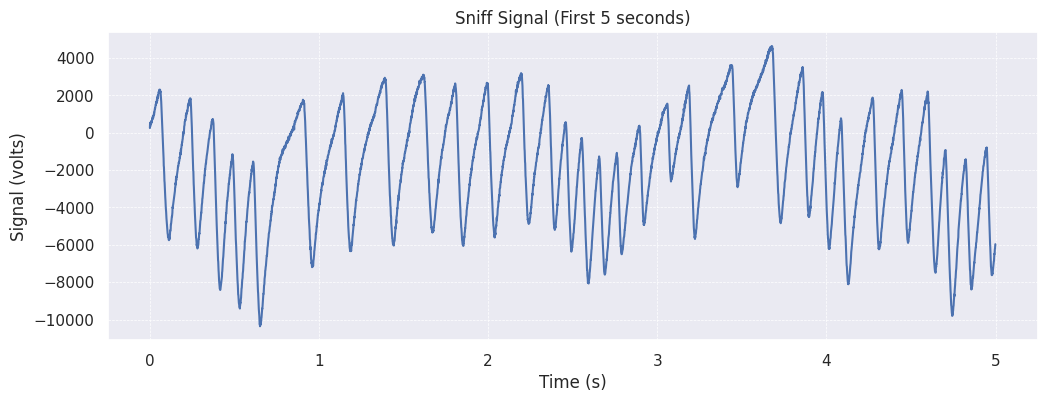

Plotted sniff signal data for the first 5 seconds.


In [6]:
sniff_series = nwbfile.acquisition.get('SniffSignal')

if sniff_series:
    print(f"Sniff signal data shape: {sniff_series.data.shape}")
    print(f"Sniff signal sampling rate: {sniff_series.rate} Hz")

    # Define a time segment to plot (e.g., first 5 seconds to see more cycles)
    time_duration_to_plot_s = 5  # seconds
    num_samples_to_plot = int(time_duration_to_plot_s * sniff_series.rate)

    # Ensure we don't exceed available data
    num_samples_to_plot = min(num_samples_to_plot, sniff_series.data.shape[0])

    # Load only the required data segment
    sniff_data_segment = sniff_series.data[:num_samples_to_plot]
    
    # Create a time vector for the x-axis
    time_vector_s = np.arange(num_samples_to_plot) / sniff_series.rate

    # Plot the sniff signal data (no seaborn styling here)
    plt.figure(figsize=(12, 4))
    plt.plot(time_vector_s, sniff_data_segment)
    plt.title(f'Sniff Signal (First {time_duration_to_plot_s} seconds)')
    plt.xlabel('Time (s)')
    plt.ylabel(f'Signal ({sniff_series.unit})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    print(f"Plotted sniff signal data for the first {time_duration_to_plot_s} seconds.")
else:
    print("SniffSignal data not found in nwbfile.acquisition")

### 3.3. Behavioral Event Times (Inhalation/Exhalation)

The NWB file contains timestamps for inhalation and exhalation events in `nwbfile.processing['behavior']`.
Let's load these timestamps and visualize their occurrences. We can plot them as event markers on a timeline or look at their distributions.

Loaded 10030 inhalation event timestamps.
Loaded 10030 exhalation event timestamps.


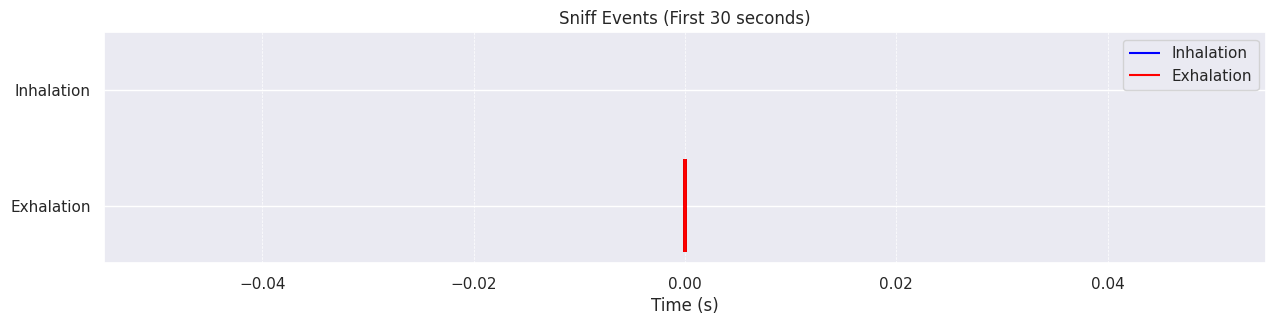

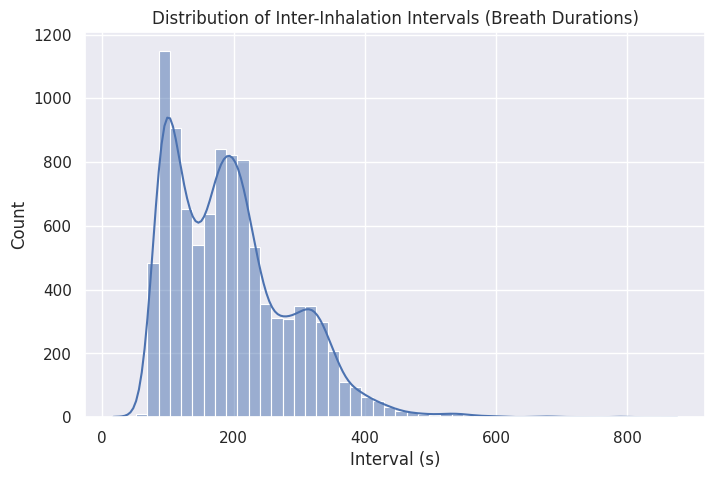

Mean breath duration (from inhalation): 196.184 s


In [7]:
behavior_module = nwbfile.processing.get('behavior')

if behavior_module:
    inhalation_timeseries = behavior_module.data_interfaces.get('inhalation_time')
    exhalation_timeseries = behavior_module.data_interfaces.get('exhalation_time')

    inhalation_timestamps = None
    exhalation_timestamps = None

    if inhalation_timeseries:
        # Timestamps are the actual event times
        inhalation_timestamps = inhalation_timeseries.timestamps[:]
        print(f"Loaded {len(inhalation_timestamps)} inhalation event timestamps.")
    else:
        print("Inhalation time series not found.")

    if exhalation_timeseries:
        exhalation_timestamps = exhalation_timeseries.timestamps[:]
        print(f"Loaded {len(exhalation_timestamps)} exhalation event timestamps.")
    else:
        print("Exhalation time series not found.")

    if inhalation_timestamps is not None and exhalation_timestamps is not None:
        # Plot a segment of these events on a timeline
        # Use seaborn styling for this kind of plot
        sns.set_theme()
        plt.figure(figsize=(15, 3))
        
        # Consider a shorter window if there are too many events
        plot_duration_s = 30 # Plot events within the first 30 seconds
        
        inh_events_to_plot = inhalation_timestamps[inhalation_timestamps < plot_duration_s]
        exh_events_to_plot = exhalation_timestamps[exhalation_timestamps < plot_duration_s]

        plt.eventplot(inh_events_to_plot, lineoffsets=1, linelengths=0.8, colors='blue', label='Inhalation')
        plt.eventplot(exh_events_to_plot, lineoffsets=0, linelengths=0.8, colors='red', label='Exhalation')
        
        plt.yticks([0, 1], ['Exhalation', 'Inhalation'])
        plt.xlabel('Time (s)')
        plt.title(f'Sniff Events (First {plot_duration_s} seconds)')
        plt.legend()
        plt.ylim([-0.5, 1.5])
        plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
        plt.show()
        
        # Plot histograms of inter-event intervals (breath cycle duration)
        if len(inhalation_timestamps) > 1:
            inhalation_intervals = np.diff(inhalation_timestamps)
            plt.figure(figsize=(8, 5))
            sns.histplot(inhalation_intervals, kde=True, bins=50)
            plt.title('Distribution of Inter-Inhalation Intervals (Breath Durations)')
            plt.xlabel('Interval (s)')
            plt.ylabel('Count')
            plt.show()
            print(f"Mean breath duration (from inhalation): {np.mean(inhalation_intervals):.3f} s")
            
    else:
        print("Could not plot sniff events due to missing data.")
        
else:
    print("Behavior processing module not found.")

## 4. Summary of Findings and Future Directions

### Summary

This notebook demonstrated how to:
- Connect to the DANDI archive and retrieve metadata for Dandiset `001433`.
- Load a specific NWB file (`sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`) from this Dandiset.
- Inspect basic metadata and structure of the NWB file, including acquisition series (LFP, SniffSignal) and processed behavioral events (inhalation/exhalation times).
- Visualize segments of LFP data from selected channels, showing raw voltage traces over time.
- Visualize a segment of the raw sniff thermistor signal.
- Plot the occurrence of inhalation and exhalation events and analyze the distribution of breath cycle durations.

The data within this NWB file appears to be well-structured, providing synchronized LFP recordings from the olfactory bulb and respiratory signals, along with precisely timed sniff events. This allows for analyses correlating neural activity with respiratory phase and patterns.

### Possible Future Directions

Based on the data explored, several avenues for further analysis could be pursued:

1.  **LFP Analysis:**
    *   **Spectral Analysis:** Calculate and visualize power spectral densities (PSDs) of LFP signals across different channels to identify dominant frequency bands (e.g., theta, gamma oscillations) and how they relate to sniffing.
    *   **Time-Frequency Analysis:** Use wavelets or short-time Fourier transforms (STFT) to explore how spectral power changes over time, particularly in relation to sniff cycles.
    *   **Coherence Analysis:** Investigate coherence between LFP signals from different channels or between LFP and the sniff signal to understand neural synchrony and its relation to respiration.

2.  **Sniff-Triggered Analysis:**
    *   Align LFP data to the onset of inhalation or exhalation events to compute sniff-triggered averages of LFP signals or spectral power. This can reveal phase-locking of neural oscillations to the respiratory rhythm.

3.  **Behavioral State Analysis:**
    *   If additional behavioral annotations are available (e.g., movement, exploration), correlate changes in LFP patterns or sniff parameters (rate, depth) with different behavioral states. (Note: This specific file primarily focuses on sniffing and LFP).

4.  **Cross-Session/Subject Comparisons:**
    *   Extend these analyses to other NWB files within the Dandiset (other sessions or subjects) to assess consistency and variability of the observed neurophysiological phenomena. The Dandiset contains multiple files from different subjects and sessions.

5.  **Advanced Signal Processing:**
    *   Apply more sophisticated signal processing techniques, such as source localization (if electrode positions are sufficiently detailed) or advanced methods for detecting oscillatory bursts.

Users are encouraged to adapt the code provided in this notebook to explore these and other questions using the rich dataset available in Dandiset 001433. Remember to consult the NWB documentation and relevant literature for best practices in neurophysiological data analysis.

---

End of Notebook.

In [8]:
# Final cell to ensure all plots are shown if running in certain environments
if 'plt' in locals() and hasattr(plt, 'show'):
    plt.show()

# Close the HDF5 file and remfile object if they are open
# This helps in releasing resources, although NWBHDF5IO might handle some of this.
if 'io' in locals() and hasattr(io, 'close'):
    try:
        io.close()
        print("NWBHDF5IO closed.")
    except Exception as e:
        print(f"Error closing NWBHDF5IO: {e}")

if 'h5_file' in locals() and hasattr(h5_file, 'close'):
    try:
        h5_file.close()
        print("HDF5 file (via h5py) closed.")
    except Exception as e:
        print(f"Error closing HDF5 file: {e} (might be already closed by NWBHDF5IO)")
        
if 'remote_file' in locals() and hasattr(remote_file, 'close'):
    try:
        remote_file.close()
        print("Remfile object closed.")
    except Exception as e:
        print(f"Error closing remfile: {e}")

NWBHDF5IO closed.
HDF5 file (via h5py) closed.
Remfile object closed.
